In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.deterministic import DeterministicProcess

In [14]:
spy_df = pd.read_csv("spy.csv")
spy_df.head()

,Date,Open,High,Low,Close,Volume,Day,Week,Weekday
0,1993-01-29,25.236169,25.236169,25.110616,25.218233,1003200,29,4,4
1,1993-02-01,25.236165,25.397591,25.236165,25.397591,480500,1,5,0
2,1993-02-02,25.379652,25.469333,25.325844,25.451397,201300,2,5,1
3,1993-02-03,25.487262,25.738368,25.469326,25.720432,529400,3,5,2
4,1993-02-04,25.810113,25.881857,25.523134,25.828049,531500,4,5,3


In [15]:
#'Date' column to datetime 
spy_df['Date'] = pd.to_datetime(spy_df['Date'])

#data from 2017 to 2022
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2022-12-31')
mask = (spy_df['Date'] >= start_date) & (spy_df['Date'] <= end_date)
spy_df = spy_df.loc[mask]

#data from the end of each month
mask = (spy_df['Date'] + pd.offsets.MonthEnd(0) == spy_df['Date'])
spy_df = spy_df.loc[mask]


print(spy_df)

           Date        Open        High         Low       Close     Volume  \
6045 2017-01-31  204.423584  204.981980  203.829183  204.918930   75880800   
6064 2017-02-28  213.150688  213.402861  212.565288  212.970566   96961900   
6087 2017-03-31  213.381456  213.933228  213.182456  213.236740   73733100   
6128 2017-05-31  218.754450  218.790640  217.669003  218.392639   91796000   
6150 2017-06-30  220.221191  220.612048  219.584926  219.784897   86820700   
6170 2017-07-31  224.847655  224.947641  224.084138  224.302292   65838700   
6193 2017-08-31  224.256920  225.211323  223.647923  224.956818  103803900   
6235 2017-10-31  234.924696  235.162205  234.586719  234.897293   60304800   
6256 2017-11-30  240.935273  243.027085  240.853064  242.077103  127894400   
6297 2018-01-31  259.583752  260.107066  257.701562  258.821686  108364800   
6316 2018-02-28  253.110995  253.579252  249.080405  249.410919  121907800   
6358 2018-04-30  246.363012  246.943757  243.754273  243.828033 

In [16]:
spy_df['Time'] = np.arange(len(spy_df.index))

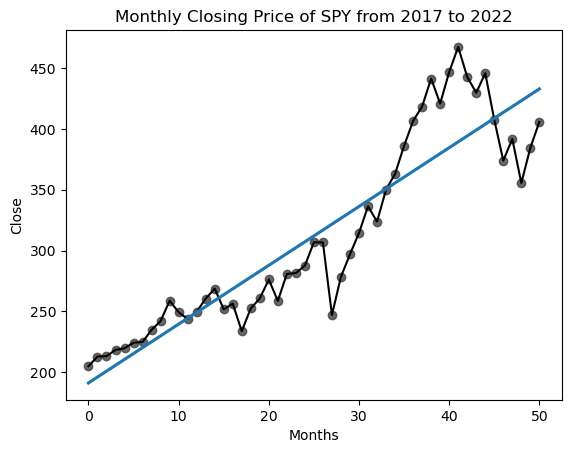

In [41]:
fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=spy_df, color='black')
ax = sns.regplot(x='Time', y='Close', data=spy_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Monthly Closing Price of SPY from 2017 to 2022')
ax.set_xlabel('Months')

fig.savefig('linear_re_5_year.png')

In [23]:

spy_df['Volume'] = pd.to_numeric(spy_df['Volume'])


spy_df['Volume'] = spy_df['Volume'] * spy_df['Close']

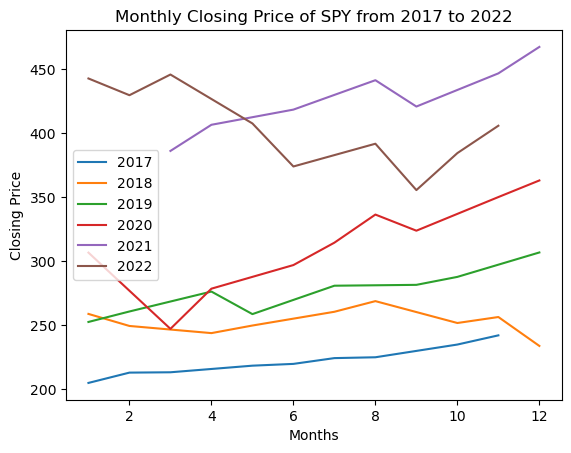

In [40]:
spy_df['Year'] = spy_df['Date'].dt.year


fig, ax = plt.subplots()

for year in spy_df['Year'].unique():
    
    year_data = spy_df[spy_df['Year'] == year]
    
    # select every month end
    mask = (year_data['Date'].dt.is_month_end)
    month_end_data = year_data.loc[mask]
    
    # plot the data for the current year
    ax.plot('Month', 'Close', data=month_end_data, label=year)

# set plot title 
ax.set_title('Monthly Closing Price of SPY from 2017 to 2022')
ax.set_xlabel('Months')
ax.set_ylabel('Closing Price')


ax.legend()

plt.show()

fig.savefig('Simple_5_year.png')

In [54]:
spy_df = pd.read_csv("spy.csv")
spy_df.head()

,Date,Open,High,Low,Close,Volume,Day,Week,Weekday
0,1993-01-29,25.236169,25.236169,25.110616,25.218233,1003200,29,4,4
1,1993-02-01,25.236165,25.397591,25.236165,25.397591,480500,1,5,0
2,1993-02-02,25.379652,25.469333,25.325844,25.451397,201300,2,5,1
3,1993-02-03,25.487262,25.738368,25.469326,25.720432,529400,3,5,2
4,1993-02-04,25.810113,25.881857,25.523134,25.828049,531500,4,5,3


In [55]:
# convert 'Date' column to datetime 
spy_df['Date'] = pd.to_datetime(spy_df['Date'])

#data from 2017 to 2022
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2022-12-31')
mask = (spy_df['Date'] >= start_date) & (spy_df['Date'] <= end_date)
spy_df = spy_df.loc[mask]

#end of each month
mask = (spy_df['Date'] + pd.offsets.MonthEnd(0) == spy_df['Date'])
spy_df = spy_df.loc[mask]


print(spy_df)

           Date        Open        High         Low       Close     Volume  \
4787 2012-01-31  107.268765  107.398759  106.179980  106.700005  157212000   
4807 2012-02-29  111.932616  112.282006  110.941342  111.331360  185934700   
4849 2012-04-30  114.340937  114.422550  113.834971  114.145073  115092200   
4871 2012-05-31  107.485872  108.089763  106.367834  107.290009  196186000   
4913 2012-07-31  113.604508  113.916216  112.964668  112.964668  120575900   
...         ...         ...         ...         ...         ...        ...   
7408 2022-06-30  372.988008  377.369818  369.339823  373.989288  112508300   
7451 2022-08-31  396.473257  397.771932  391.625539  391.764313   76029700   
7472 2022-09-30  360.146179  364.237408  355.407958  355.547302  153711200   
7493 2022-10-31  384.673570  386.624602  383.498971  384.444611   96631300   
7514 2022-11-30  393.682186  405.816467  391.681394  405.816467  144566700   

      Day  Week  Weekday  
4787   31     5        1  
4807   29

In [56]:
spy_df['Time'] = np.arange(len(spy_df.index))

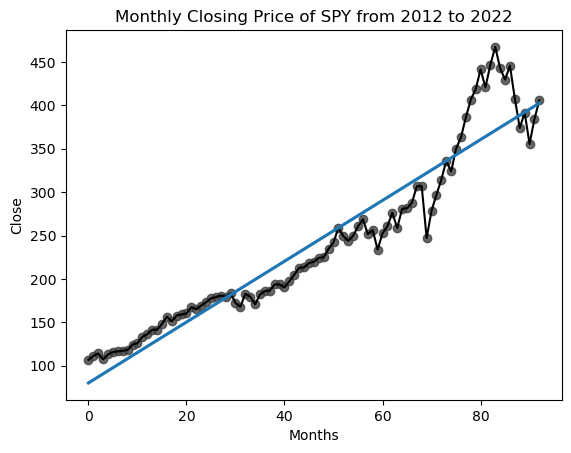

In [57]:
fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=spy_df, color='black')
ax = sns.regplot(x='Time', y='Close', data=spy_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Monthly Closing Price of SPY from 2012 to 2022')
ax.set_xlabel('Months')
fig.savefig('linear_re_10_year.png')